<a href="https://colab.research.google.com/github/patriciamediavilla/L1P2/blob/main/quantumclasificador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clasifiación con SVM



In [ ]:
#importamos las librerias necesarias
import numpy as np #numpy
import pandas as pd #pandas
import sklearn as sk #scikit-learn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split

Subimos los datos necesarios para hacer el problema, de momento solo los datos de train para después ahcer la prueba con los de test.

In [ ]:
datostrain = pd.read_csv('traindata.csv', sep=',')
datostrain.head()

,Unnamed: 0,FeatureA,FeatureB,Target
0,0,5.152212,4.649557,1.0
1,1,5.969026,0.502655,1.0
2,2,3.581416,5.654867,1.0
3,3,1.759292,1.068142,1.0
4,4,5.089380,4.586725,1.0


Observamos si hay o no valores faltantes

In [ ]:
datostrain.isna().sum()

Unnamed: 0    0
FeatureA      0
FeatureB      0
Target        0
dtype: int64

Subimos los datos para hacer las pruebas.

In [ ]:
datosval = pd.read_csv('validationdata.csv', sep=',')
datosval.head()

,Unnamed: 0,FeatureA,FeatureB,Target
0,0,4.900885,1.256637,1.0
1,1,4.586725,1.570796,1.0
2,2,0.000000,3.267256,1.0
3,3,2.638938,4.209734,1.0
4,4,4.963716,4.963716,1.0


Observamos si hay o no valores faltantes

In [ ]:
datosval.isna().sum()

Unnamed: 0    0
FeatureA      0
FeatureB      0
Target        0
dtype: int64

Representamos los datos del enunciado del problema, los cuales debemos clasificar.

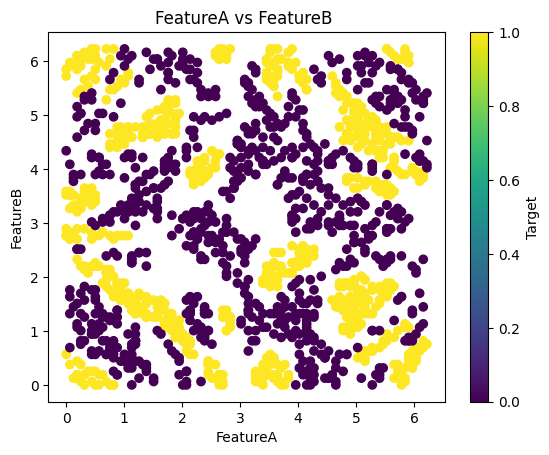

In [ ]:
plt.scatter(datostrain['FeatureA'], datostrain['FeatureB'], c=datostrain['Target'], cmap='viridis')
plt.xlabel('FeatureA')
plt.ylabel('FeatureB')
plt.title('FeatureA vs FeatureB ')
plt.colorbar(label='Target')
plt.show()

Se nos ha inicado que debemos utilizar support vector machine vamos a ir creando modelos con el fin de ir acotando los parámetros.

Primero hacemos la separación para tener datos de entrenamiendo y de test. Aunque haciendo cross validation no sobre entrenariamos el modelo (lo se hacer).

In [ ]:
X = datostrain[['FeatureA','FeatureB']]
y = datostrain["Target"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Lo primero que vamos a acotar es el kernel, para eso probamos varios y vemos con cual nos da con más presición.

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#SVM lineal
lineal = svm.SVC(kernel='linear')
lineal.fit(X_train, y_train)
y_pred_lineal = lineal.predict(X_test)
accuracy_lineal = accuracy_score(y_test, y_pred_lineal)

# SVM radial
radial = svm.SVC(kernel='rbf')
radial.fit(X_train, y_train)
y_pred_radial = radial.predict(X_test)
accuracy_radial = accuracy_score(y_test, y_pred_radial)

# SVM de kernel polinómico
pol = svm.SVC(kernel='poly', degree=3)
pol.fit(X_train, y_train)
y_pred_pol = pol.predict(X_test)
accuracy_pol = accuracy_score(y_test, y_pred_pol)

# SVM sigmoidal
sig = svm.SVC(kernel='sigmoid')
sig.fit(X_train, y_train)
y_pred_sig = sig.predict(X_test)
accuracy_sig = accuracy_score(y_test, y_pred_sig)

precisions = [['SVM lineal', accuracy_lineal],
              ['SVM radial', accuracy_radial],
              ['SVM polinómico', accuracy_pol],
              ['SVM sigmoidal', accuracy_sig]]

tabla = pd.DataFrame(precisions, columns=['Modelo SVM', 'Precisión'], index=None)
print(tabla.to_string(index=False).format("{:<20} {:>10.4f}"))

    Modelo SVM  Precisión
    SVM lineal   0.541667
    SVM radial   0.595833
SVM polinómico   0.537500
 SVM sigmoidal   0.489583


Observamos que el que mejor ajusta los datos es el que tiene el kernel radial, por lo que continuamos con este ajustando los demás parámetros, como los hiper parámetros C y gamma. Comenzamos por ajustar el parámetro C.

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Definir el espacio de búsqueda para los hiperparámetros
param_grid = {
    'kernel': ['rbf'],
    'C': [0.1, 1, 10,100,1000,5000,10000,50000]}

# Crear un modelo SVM
svm_model = svm.SVC()

# Realizar la búsqueda en rejilla
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

precisions = [['Mejor SVM', accuracy_best]]  # Agrega el mejor modelo

tabla = pd.DataFrame(precisions, columns=['Modelo SVM', 'Precisión'], index=None)
print(tabla.to_string(index=False).format("{:<20} {:>10.4f}"))
best_kernel = best_model.kernel
best_C = best_model.C
best_gamma = best_model.gamma

print(" Mejor kernel:", best_kernel)
print(" Mejor valor de C:", best_C)
print(" Mejor valor de gamma:", best_gamma)

Modelo SVM  Precisión
 Mejor SVM     0.9125
 Mejor kernel: rbf
 Mejor valor de C: 50000
 Mejor valor de gamma: scale


Vemos que nos da mejor ajuste con mayor C, es decir, 50000, esto seguramnte sea porque al ser la calle más ancha, quedan más valores en l calle sin estar bien clasificados.
Ahora vamos a ver cual es el gamma que más se ajusta.

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Definir el espacio de búsqueda para los hiperparámetros
param_grid = {
    'kernel': ['rbf'],
    'C': [50000],
    'gamma': [1,10,30,50]}

# Crear un modelo SVM
svm_model = svm.SVC()

# Realizar la búsqueda en rejilla
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

tabla = pd.DataFrame(precisions, columns=['Modelo SVM', 'Precisión'], index=None)
print(tabla.to_string(index=False).format("{:<20} {:>10.4f}"))

Modelo SVM  Precisión
 Mejor SVM     0.9125


In [ ]:
best_kernel = best_model.kernel
best_C = best_model.C
best_gamma = best_model.gamma

print(" Mejor kernel:", best_kernel)
print(" Mejor valor de C:", best_C)
print(" Mejor valor de gamma:", best_gamma)

 Mejor kernel: rbf
 Mejor valor de C: 50000
 Mejor valor de gamma: 30


In [ ]:
# Crear un modelo SVM
svm_model = svm.SVC(kernel = 'rbf', C = 50000, gamma = 1)
svm_model.fit(X_train, y_train)


SVC(C=50000, gamma=1)

Ahora vamos a utilizar todos los datos para ver si de verdad funciona el modelo.

#Clase 26/09/2023
##Hacer nuestro propio Kernel

Primero vamos a hacerlo normal

In [ ]:
X_train = np.array([0,2,4,5,7]).reshape(-1, 1)
y_train = np.array([1,1,0,1,1]).reshape(-1, 1)
X_test = np.array([1,3,6]).reshape(-1, 1)
y_test = np.array([1,0,1]).reshape(-1, 1)

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#SVM lineal
lineal = svm.SVC(kernel='linear')
lineal.fit(X_train, y_train)
y_pred_lineal = lineal.predict(X_test)
accuracy_lineal = accuracy_score(y_test, y_pred_lineal)

# SVM radial
radial = svm.SVC(kernel='rbf')
radial.fit(X_train, y_train)
y_pred_radial = radial.predict(X_test)
accuracy_radial = accuracy_score(y_test, y_pred_radial)

# SVM de kernel polinómico
pol = svm.SVC(kernel='poly', degree=3)
pol.fit(X_train, y_train)
y_pred_pol = pol.predict(X_test)
accuracy_pol = accuracy_score(y_test, y_pred_pol)

# SVM sigmoidal
sig = svm.SVC(kernel='sigmoid')
sig.fit(X_train, y_train)
y_pred_sig = sig.predict(X_test)
accuracy_sig = accuracy_score(y_test, y_pred_sig)

precisions = [['SVM lineal', accuracy_lineal],
              ['SVM radial', accuracy_radial],
              ['SVM polinómico', accuracy_pol],
              ['SVM sigmoidal', accuracy_sig]]

tabla = pd.DataFrame(precisions, columns=['Modelo SVM', 'Precisión'], index=None)
print(tabla.to_string(index=False).format("{:<20} {:>10.4f}"))

    Modelo SVM  Precisión
    SVM lineal   0.666667
    SVM radial   0.666667
SVM polinómico   0.666667
 SVM sigmoidal   0.666667


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Y ahora vamos a adaptar nuestro modelo, viendo los datos vemos que el 0,1,2 son una categoria (1), 3 y 4 son la categoría (2) y los demás vulven a ser la categoría 1. Para adaptarlo vamos a mapear, es decir, adaptar nuestros datos.
Creando una parábola ya que nuestros puntos lo reuqieren

In [ ]:
X_train = np.array([0,2,4,5,7])
y_train = np.array([1,1,0,1,1])
X_test = np.array([1,3,6])
y_test = np.array([1,0,1])

In [ ]:

X_train_map = np.array([[i,(i-3.5)**2] for i in X_train])
X_test_map = np.array([[i,(i-3.5)**2] for i in X_test])


from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#SVM lineal
lineal = SVC(kernel='linear')
lineal.fit(X_train_map, y_train)
accuracy_lineal = lineal.score(X_test_map, y_test)

accuracy_lineal

1.0

Ahora tenemos una división perfecta de los datos.

Para hacer un kernel que me clasifique bien los datos, para conseguir el kernel tenemos que hacer una matriz de productos de todos los vectores con todos, ese es nuestro kernel.

In [ ]:
def kernel(x1, x2):
  k = []
  for i in x1:
    L = []
    for j in x2:
      L.append(i.dot.j)
    k.append(L)
  return k

In [ ]:
y_train_map = np.array([[i,(i-3.5)**2] for i in y_train])
y_test_map = np.array([[i,(i-3.5)**2] for i in y_test])

#Clase 03/10/2023

Estas son las librerias que necesitamos para hacer un kernel quántico

In [ ]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 14.2 MB/s eta 0:00:00


In [ ]:
from qiskit.circuit.library import ZZFeatureMap
from sklearn.svm import SVC

¿Como le decimos que circuito usar para elcircuit bag? Para eso tenemos circuitos del tipo(1)

In [ ]:
#Feature dimension =número de atribruto, número de reps, entrelazamiento, data_map, prefijo, si pide barreras o no
adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement="linear")

NameError: ignored


Hay que tener cuidado con la dimension tmabién si el circuito es muy grande puede dar error ¿que hacemos si tenemos 50 colunas? -> PCA, disminuir dimensiones es peligroso porque a veces puedes perder la esencia de lo que estás haciendo en PCA se fia de la variabilidad de los datos.
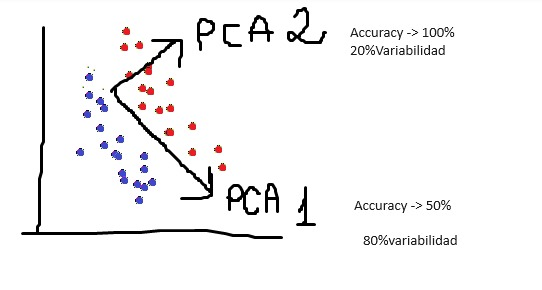

Podemos ver que el PCA1 nos da un accuracy malo y sin embargo el PCA2 nos da el 100% miramos como su fuese un folio perpendicular avanzanco en esa direccion.

Otra manera de reducir la dimensionalidad es utilizar el random forest.

No es una forma facil de ver que features le gustan al modelo cuántico.

Ver lo de Random forest -> SFS(clase)

La función U hace que rote a la izq todos los estados, es decir, es la puerta Z de pauli en el 'medio de la esfera' aplicando la puesta de hadamar. Pero para utilzar la U hay que escar los datos entre 0 y 2pi, ya que si metemos un valor mayor obtendrá el mismo valor que otro, se solapará y no codificará bien.

Este feature Map hace es que puede definir un operador de dos en dos de la puerta Z.
Pone una puerta de hadamar primero para llevarlo al eje Z para luego hacer rotacionescon la puerta Z (que son las U´s lo que vimos el otro dia.

La función que llama a fi es el mata_map_func, esto hace que no se los vaya el ángulo dando vueltas todo el rato.

Luego hace entrelazamiento por lo que se mueve un poco rara, y dentro de este, hace rotaciones conjuntas.

Esto se puede solucionar con la función que vimos que escala en [0,2pi]. Hay que tener cuidado con el 2, por lo que no ponemos 2pi. No nos tenemos que pasar de 2pi, porque lo que hace al escalar es una función, si nos pasamos estamos codificando mal y obtendría dos valores iguales escalados para uno mismo

Luego hace entrelazamiento por lo que se mueve un poco rara, y dentro de este, hace rotaciones conjuntas.



Tipo de entrelazamientos:
. Lineal:

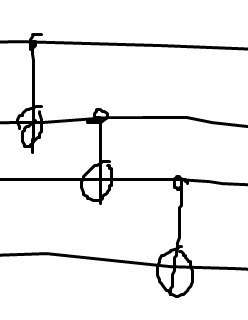

. Circular:

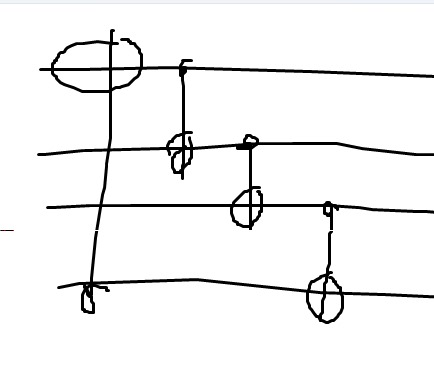

. Full:
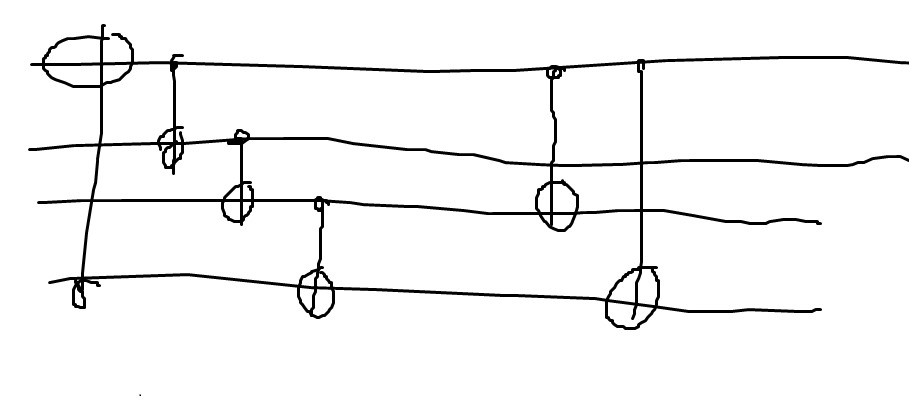

Siempre hay que pensar si el circuito que se está haciendo se ajunta a lo que tenemos para procesarlo.

Los más interesantes para que sea realista es liak o circular, repeticiones 1 o 2, 3 si tenmos muy pocas features (2 por ejemplo), si tenemos 10 o 12, ni de coña.

Queremos aplicaciones ded más alto nivel para evitar el hw. Para esto es lo que en qistkit se llama primitiva -> PRIMITIVES

De estas tenemos dos:
-Sampler
-Eliminator

Las dos cosas que hacemos con un computador cuántico:
- Le mandamos un circuito para que haga cuentas, medimos y sacamos los histogramas (lo de las barras) Sambler en vez de hacer un run normal, es que tiene unos mecanismos de mitigación de errores, que lo podemos poner como parámetros (nivel de 1,2,3) y utiliza menos cosas o más cosas. Por dentro el Sample utiliza la mitigación, luego hace el run, luego más mitigación, y nos devuelve una quasi-probabilites (en vez de darnos el número de las cuentas como hacemos normalmente, nos dice el equivalente corregido es 50% en este estado, 50% en el otro)
Al final estas quasi-prob. no tienen por qué sumar uno, porque no son medidas si no corregidas.
-  El estimador lo que hace es que: a veces lo que buscamos es un valor esperado: |<fi|H|fi>|^2 nos dice el valor esperado de esto -> se utiliza en optimización. Lo devuelve con un error -> La diferencia entre esto y medir es mínima, lo que hace aquí es que en vez de medir en la Z, lo queremos en una dirección concreta -> esto es poniendo puertas de hadamard al principio para llevarlo a la Z y rotarlo y luego devolverlo con otra puerta Z, pero este estimador lo hace directamente.

In [ ]:
adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement="linear")

sampler = Sampler() #Hace automatiamnete lo de elegir computadro y tal

fidelity = ComputeUncompute(sampler=sampler)

adhoc_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=adhoc_feature_map)

#lo llama fidelity porque compara dos valores, cuanto se parece

Si ponemos el nivel más alto de sampler es chungo porque manda un montón de circuitos adicionales con una sola puerta ... (no sé) pero solo se usa con hw real
Todo lo de los errores se usa en los ordenadores reales unicamente

Lo de ComputeUncomputer: si yo tengo un feature map tal que:

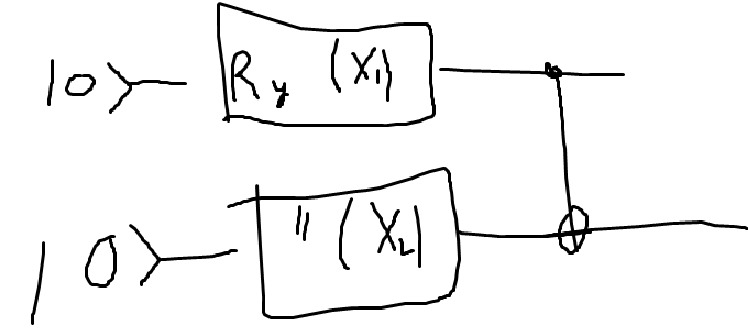

Al hacer el inverso conjugado es que los paréntesis van al revés y la rotación la empieza al otro lado La primera parte me crea el vector del punto A, y la otra parte el vector del punto B en inverso conjugado para que los pueda comparar

Para convertir datos al mundo cuántico tengo que hacer un circuito que los pase a unos estados. Lo que hacemos de <fi(B)|fi(A)> es para ver cómo de parecidos son, lo que devuelve un número, que es la probabilidad de que de 0 (lo equivalente cuántico al producto escalar)

Cuando medimos algo, lo que hacemos es <0|fi>, que lo que hacemos es compararlo con el 0.

Dependiendo de cómo se haga el circuito es un buen kernel o no. Si utilizo zzfeature map, le pasas ángulos uniformes y te reparte los vectores por todo el espacio. No es ni bueno ni malo, es bueno si como están repartidos tus datos son separables, si no, de qué nos vale. Es facil probarlo, porque le ponemos la función y le damos valores.

Si yo conozco algo sobre la estructira de los datos, puedo hacer un zzfeature map que los separe bien. Esto se puede ver en química, si una molécula reacciona con otra, lo que depende de la estructura de los orbitales, lo que me monta algo que tenga que ver con las estructuras químicas. Hacemos un feature map a medida por así decirlo.

En criptografía también está funcionando -> los problemas con el alg.discreto -> si yo lo uso para codificar mis datos, acabo con una nube de puntos que parece ruido, unoo clásico no es capaz de deshacerlo, como sé que tengo estructura de logaritmo -> algoritmo de shor -> me aprende

Es dificil saber la estructura que tienen los datos.

Dense coding -> imagen de las 9,00 ponerlo

Feature map lo definimos utilizando ZZ, hay más maneras ( aquí qiskit.circuit.library ), pero luego podemos hacer el nuestro con nuestros parámetros.

Ir a kaggle, seleccionar un conjunto de datos que la gente usa en clásico y no se separa bien, y probar a jugar con features maps diferentes, pca

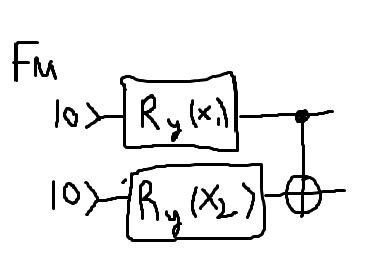



#Clase 05/10/2023

In [4]:
#Importamos las librerías y la base de datos necesarias

import numpy as np #numpy
import pandas as pd #pandas
import sklearn as sk #scikit-learn
import matplotlib.pyplot as plt #gráfica Matplotlib
from tabulate import tabulate
from sklearn.model_selection import train_test_split

df = pd.read_csv('heart_cleveland.csv',sep=',')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [5]:
conteo = df['condition'].value_counts()
conteo

0    160
1    137
Name: condition, dtype: int64

Vamos a tener las mismas observaciones de uno que de otro

In [6]:
filas_0 = df[df['condition'] == 0]
filas_1 = df[df['condition'] == 1]

df_0 = filas_0.head(137)
df_1 = filas_1.head(137)
data = pd.concat([df_0, df_1])

mezclamos para no tener los 0 arriba y los 1 abajo

In [7]:
df = df.sample(frac=1).reset_index(drop=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,55,0,1,135,250,0,2,161,0,1.4,1,0,0,0
1,57,1,2,150,168,0,0,174,0,1.6,0,0,0,0
2,57,0,3,120,354,0,0,163,1,0.6,0,0,0,0
3,57,1,3,110,201,0,0,126,1,1.5,1,0,1,0
4,42,0,2,120,209,0,0,173,0,0.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,63,0,2,135,252,0,2,172,0,0.0,0,0,0,0
293,57,1,1,124,261,0,0,141,0,0.3,0,0,2,1
294,69,1,2,140,254,0,2,146,0,2.0,1,3,2,1
295,62,0,3,160,164,0,2,145,0,6.2,2,3,2,1


In [8]:
from sklearn.preprocessing import MinMaxScaler

X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
Y = df[['condition']]

scaler = MinMaxScaler(feature_range=(0.1, np.pi-0.1))
scaler.fit(X)
df_scalada = pd.DataFrame(scaler.transform(X), columns=X.columns)


Sabemos ue para entrenar un modelo cuánrico necesitamos mucho tiempo, por lo que vamos a hacer un pca para quedarnos solo con dos columas, para elegirlas vamos a hacer un clasificador random foerst para sacar las características que más me convienen

In [12]:
from sklearn.ensemble import RandomForestClassifier

r = RandomForestClassifier()
# Ajusta el modelo a tus datos
r.fit(X, Y)

# Accede a la importancia de las variables
feature_importances = r.feature_importances_

# Crea un DataFrame para mostrar la importancia de cada variable
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Ordena el DataFrame por importancia en orden descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Muestra las variables más importantes
print(importance_df)

<ipython-input-12-33563ed1b2d9>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r.fit(X, Y)


     Feature  Importance
7    thalach    0.133346
12      thal    0.123312
2         cp    0.121293
11        ca    0.119907
9    oldpeak    0.108363
0        age    0.088318
4       chol    0.072907
3   trestbps    0.068809
8      exang    0.055177
10     slope    0.047052
1        sex    0.029068
6    restecg    0.020843
5        fbs    0.011606


Vamos a coger las dos primeras variables ya que trada mucho en ejecuatar, es decir, thalach y thal.

In [22]:
x = df[['thalach','thal']]
y = df[['condition']]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#SVM lineal
lineal = svm.SVC(kernel='linear')
lineal.fit(X_train, Y_train)
y_pred_lineal = lineal.predict(X_test)
accuracy_lineal = accuracy_score(Y_test, y_pred_lineal)

# SVM radial
radial = svm.SVC(kernel='rbf')
radial.fit(X_train, Y_train)
y_pred_radial = radial.predict(X_test)
accuracy_radial = accuracy_score(Y_test, y_pred_radial)

# SVM de kernel polinómico
pol = svm.SVC(kernel='poly', degree=3)
pol.fit(X_train, Y_train)
y_pred_pol = pol.predict(X_test)
accuracy_pol = accuracy_score(Y_test, y_pred_pol)

# SVM sigmoidal
sig = svm.SVC(kernel='sigmoid')
sig.fit(X_train, Y_train)
y_pred_sig = sig.predict(X_test)
accuracy_sig = accuracy_score(Y_test, y_pred_sig)

precisions = [['SVM lineal', accuracy_lineal],
              ['SVM radial', accuracy_radial],
              ['SVM polinómico', accuracy_pol],
              ['SVM sigmoidal', accuracy_sig]]

tabla = pd.DataFrame(precisions, columns=['Modelo SVM', 'Precisión'], index=None)
print(tabla.to_string(index=False).format("{:<20} {:>10.4f}"))

    Modelo SVM  Precisión
    SVM lineal   0.800000
    SVM radial   0.733333
SVM polinómico   0.783333
 SVM sigmoidal   0.300000


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

El modelo clasico nos da una prediccion buena utilizando el kernel lineal asi que vamos a guardar las predicciones del modelo svm que nos interesa, que es el lineal.

In [31]:
predicciones_clasicas = lineal.predict(X_test)

In [1]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 12.3 MB/s eta 0:00:00


In [2]:
!pip install qiskit_machine_learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512381 sha256=f69c70a5f4d712fb2d622eaff5ba8e901b08e104fbc2bff9ab0cba80be8e7c69
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [3]:
from qiskit.circuit.library import ZZFeatureMap
from sklearn.svm import SVC
from qiskit.primitives import Sampler
from qiskit.algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

<ipython-input-3-c4f89132c90f>:4: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.state_fidelities import ComputeUncompute


In [17]:
adhoc_feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement="linear")

sampler = Sampler() #Hace automatiamnete lo de elegir computadro y tal

fidelity = ComputeUncompute(sampler=sampler) #Hacia alente y hacia atras

adhoc_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=adhoc_feature_map) #Crea para toda la matriz

In [32]:

adhoc_svc = SVC(kernel=adhoc_kernel.evaluate)

adhoc_svc.fit(X_train, Y_train)

adhoc_score_callable_function = adhoc_svc.score(X_test, Y_test)

print(f"Callable kernel classification test score: {adhoc_score_callable_function}")

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


Callable kernel classification test score: 0.7666666666666667


In [33]:
predicciones_cuanticas = adhoc_svc.predict(X_test)
accuracy_cuantico = accuracy_score(Y_test, predicciones_cuanticas)

In [36]:
accuracy_cuantico

0.9333333333333333


Compara los vectores a ver como son de iguales, como son lianeales el cuantico tambien y son parecidps

In [35]:
accuracy_comparar = accuracy_score(predicciones_clasicas, predicciones_cuanticas)

In [ ]:
accuracy_comparar